In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20, n_redundant=0)

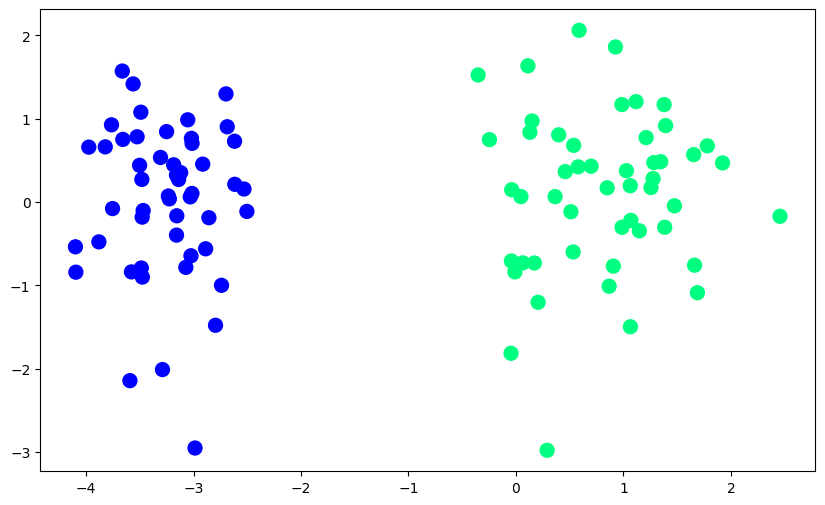

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression

lo = LogisticRegression(penalty=None, solver='sag')

lo.fit(X,y)

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [5]:
print('Coefficient: ', lo.coef_)
print('Intercept: ', lo.intercept_)

Coefficient:  [[4.85043133 0.2236976 ]]
Intercept:  [5.81915144]


In [6]:
m1 = -(lo.coef_[0][0]/lo.coef_[0][1])
b1 = -(lo.intercept_/lo.coef_[0][1])


In [7]:
X_input = np.linspace(-3,3,100)
y_input = m1*X_input+b1


In [8]:
# Gradient Decent: Batch Gradient Decent
def bgd(X,y):
    X = np.insert(X,0,1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat), X)/X.shape[0])
    return weights[1:], weights[0]
    

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [11]:
coef_, intercept_ = bgd(X,y)
print(coef_)
print(intercept_)

[4.83926872 0.21182255]
5.83338864905325


In [12]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [14]:
X_input1 = np.linspace(-3,3,100)
y_input1 = m*X_input1+b

(-3.0, 2.0)

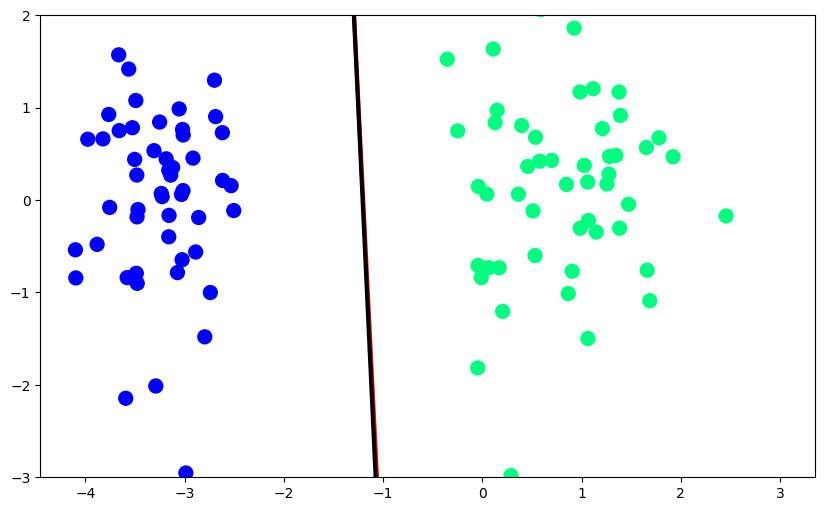

In [15]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input, color='red', linewidth=3)
plt.plot(X_input1, y_input1, color='black', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

In [16]:
# Stochastic gradient decent
def sgd(X,y):
    X = np.insert(X,0,1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(50):
        for j in range(X.shape[0]):
            idX = np.random.randint(0,X.shape[0])

            y_hat = sigmoid1(np.dot(X[idX], weights))
            error = y[idX] - y_hat
            weights = weights + lr*(np.dot(error, X[idX]))
        
    return weights[0], weights[1:]

In [17]:
def sigmoid1(z):
    return 1/(1+np.exp(-z))

In [18]:
intercept1_, coef1_ = sgd(X,y)
print('Intercept: ', intercept1_)
print('Coefficient: ', coef1_)

Intercept:  5.898698426703041
Coefficient:  [4.8479665  0.23086543]


In [19]:
m_sgd = -(coef1_[0]/coef1_[1])
b_sgd = -(intercept1_/coef1_[1])


X_input2 = np.linspace(-3,3,100)
y_input2 = m_sgd*X_input2+b_sgd

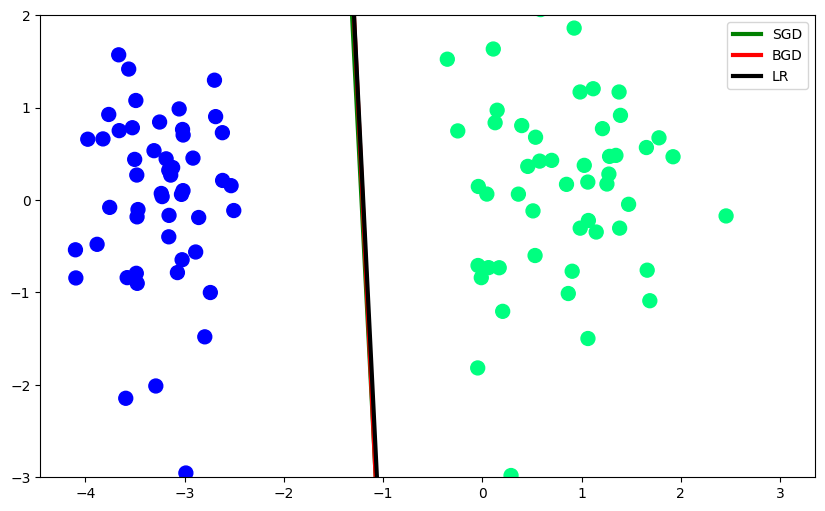

In [20]:
plt.figure(figsize=(10,6))
plt.plot(X_input2, y_input2, color='green', linewidth=3, label='SGD')
plt.plot(X_input1, y_input1, color='red', linewidth=3, label='BGD')
plt.plot(X_input, y_input, color='black', label='LR', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()

In [69]:
import random

# mini-batch gradient decent
def mbgd(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    batch_size = 10

    for i in range(500):
        for j in range(X.shape[0]//batch_size):
            idX = random.sample(range(X.shape[0]), batch_size)

            y_hat = sigmoid2(np.dot(X[idX], weights))
            error = y[idX]-y_hat
            weights = weights + lr*(np.dot(error, X[idX])/batch_size)

    return weights[0], weights[1:]

In [70]:
def sigmoid2(z):
    return 1/(1+np.exp(-z))

In [71]:
intercept2_, coef2_ = mbgd(X,y)
print('Intercept: ', intercept2_)
print('Coefficient: ', coef2_)

Intercept:  5.834108493611075
Coefficient:  [4.83899188 0.20584599]


In [72]:
m_mbgd = -(coef2_[0]/coef2_[1])
b_mbgd = -(intercept2_/coef2_[1])

X_input3 = np.linspace(-3,3,100)
y_input3 = m_mbgd*X_input3+b_mbgd



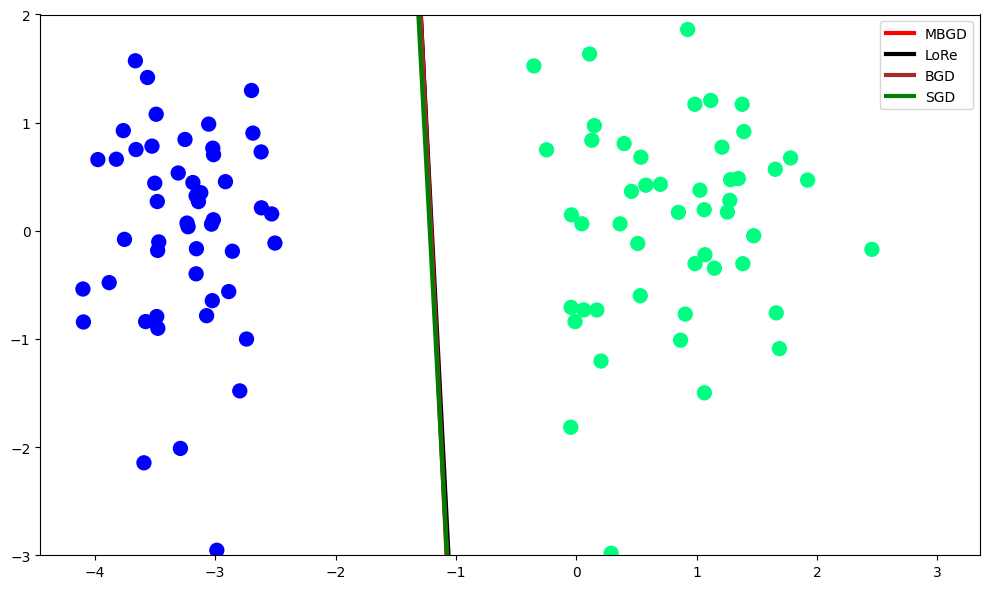

In [75]:
plt.figure(figsize=(10,6))
plt.plot(X_input3, y_input3, color='red', linewidth=3, label='MBGD')
plt.plot(X_input, y_input, linewidth=3, color='black', label='LoRe')
plt.plot(X_input1, y_input1, color='brown', linewidth=3, label='BGD')
plt.plot(X_input2, y_input2, color='green', linewidth=3, label='SGD')
plt.scatter(X[:,0], X[:,1],c=y, cmap='winter', s=100)
plt.ylim(-3,2)
plt.tight_layout()
plt.legend()
plt.show()